In [57]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib as mpl

blue='#1f77b4'
yellow='#ff7f0e'

In [58]:
#基本的な船の主要目
L_pp=3.50
B=0.57

## outputフォルダ内のすべての結果を一つのグラフ上に描画する

outputフォルダのパスを指定  
パス内のフォルダをすべて取得  
パス内のフォルダのリストをfor文で回す  
フォルダiの中のoutput.csvのパスを取得  
time,xc,yc,xc_ref,yc_ref,delta,delta_ref,npm,npm_ref,errorあたりを取得  
outputフォルダの直下にtotal_resultsみたいなフォルダを作成し、すべてのimgを作成

In [64]:
output_path=r"D:\大学関連フォルダ\研究関係\M1秋\MPCforMMGship\output\output20240206083522"
dir_list=os.listdir(path=output_path)
print(output_path, 'has')
print(dir_list)
print(len(dir_list))

D:\大学関連フォルダ\研究関係\M1秋\MPCforMMGship\output\output20240206083522 has
['sample155', 'sample275', 'sample424', 'sample563']
4


In [60]:
variables_name=['time', 'xc', 'xc_ref', 'yc', 'yc_ref', 'x1', 'x1_ref', 'y1',
    'y1_ref', 'x2', 'x2_ref', 'y2', 'y2_ref', 'psi', 'psi_ref', 'U',
    'U_ref', 'u', 'u_ref', 'v', 'v_ref', 'r', 'r_ref', 'delta',
    'delta_ref', 'delta_in', 'npm', 'npm_ref', 'npm_in', 'error']
print(variables_name)
print(len(variables_name))

['time', 'xc', 'xc_ref', 'yc', 'yc_ref', 'x1', 'x1_ref', 'y1', 'y1_ref', 'x2', 'x2_ref', 'y2', 'y2_ref', 'psi', 'psi_ref', 'U', 'U_ref', 'u', 'u_ref', 'v', 'v_ref', 'r', 'r_ref', 'delta', 'delta_ref', 'delta_in', 'npm', 'npm_ref', 'npm_in', 'error']
30


In [61]:
#単位dictの作成
unit_dict={}

for key in variables_name:
    if 'y' in key or 'x' in key or 'error' in key:
        unit_dict[key]='[m]'
    elif 'psi' in key or 'delta' in key:
        unit_dict[key]='[deg]'
    elif 'u' in key or 'v' in key or 'U' in key:
        unit_dict[key]='[m/s]'
    elif key=='r' or key=='r_ref':
        unit_dict[key]='[rad/s]'
    elif 'npm' in key:
        unit_dict[key]='[rps]'
    else:
        unit_dict[key]='[s]'
print(unit_dict)
print(len(unit_dict))

{'time': '[s]', 'xc': '[m]', 'xc_ref': '[m]', 'yc': '[m]', 'yc_ref': '[m]', 'x1': '[m]', 'x1_ref': '[m]', 'y1': '[m]', 'y1_ref': '[m]', 'x2': '[m]', 'x2_ref': '[m]', 'y2': '[m]', 'y2_ref': '[m]', 'psi': '[deg]', 'psi_ref': '[deg]', 'U': '[m/s]', 'U_ref': '[m/s]', 'u': '[m/s]', 'u_ref': '[m/s]', 'v': '[m/s]', 'v_ref': '[m/s]', 'r': '[rad/s]', 'r_ref': '[rad/s]', 'delta': '[deg]', 'delta_ref': '[deg]', 'delta_in': '[deg]', 'npm': '[rps]', 'npm_ref': '[rps]', 'npm_in': '[rps]', 'error': '[m]'}
30


In [62]:
#各変数のプロット
total_result_path=output_path+'/total_result'
os.makedirs(total_result_path, exist_ok=True)
for var in variables_name:
    if 'ref' in var or 'time' in var or 'in' in var:
        continue
    #print(var)
    fig=plt.figure(figsize=(12,4))
    for dir in dir_list:
        if "sample" not in dir:
            continue
        csv_path=output_path+'/'+dir+'/output.csv'
        #print(csv_path)
        df=pd.read_csv(csv_path)
        #print(df.head())
        plt.plot(df['time'], df[var],c='b')
    if var!='error':
        plt.plot(df['time'], df[var+'_ref'],c='r',label=var+'_ref',ls='--')
    plt.xlabel(r'$time[s]$')
    plt.ylabel(str(var)+str(unit_dict[var]))
    plt.grid()
    plt.legend()
    plt.savefig(total_result_path+'/'+var+'.png')
    plt.close()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


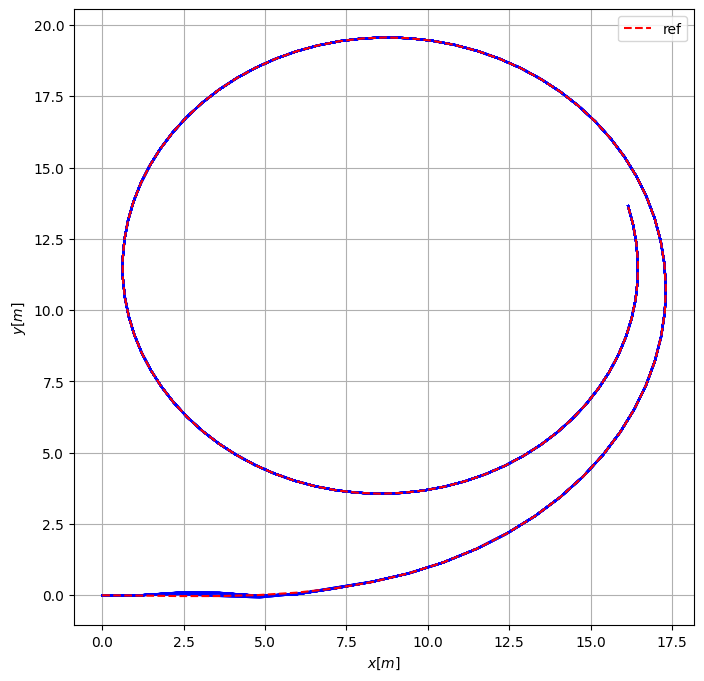

In [63]:
fig=plt.figure(figsize=(12,4))
for dir in dir_list:
    if "sample" not in dir:
        continue
    csv_path=output_path+'/'+dir+'/output.csv'
    df=pd.read_csv(csv_path)
    plt.plot(df['xc'], df['yc'],c='b')
plt.plot(df['xc_ref'], df['yc_ref'],c='r',label='ref',ls='--')
plt.xlabel(r'$x[m]$')
plt.ylabel(r'$y[m]$')
plt.grid()
plt.legend()
plt.savefig(total_result_path+'/trajectory.png')
plt.show()